# Introduction

With the worth of mobile gaming industry growing every year, understanding the factors that shape player behavior, user engagement, and game prosperity becomes a crucial study.

This project embarks on an exploration of a vast dataset comprising of 17,007 strategy games on the Apple App Store. Having been collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap.

Within this dataset we have numerous attributes on mobile strategy gaming intricacies. The goal for this project is to study player behavior, evaluate user ratings, and delve into how app price, in-app purchases as well as other factors can contribute to the success of the game.

* The goals of this project are:
    * Understand Genre Distribution: Investigate the distribution of strategy game genres to identify which genres are most prevalent in the dataset.

    * Identify Top Developers: Determine the top 20 developers with the most released apps and analyze their impact on user ratings.

    * Explore User Ratings Distribution: Analyze the distribution of user ratings to understand the overall satisfaction levels of players.

    * Examine In-App Purchases Trends: Investigate patterns in in-app purchases, including the prevalence of free and paid games and their respective user ratings.

    * Temporal Trends in Game Popularity: Utilize tables and heatmaps to identify trends in genre popularity over time, providing insights into the evolution of player preferences.

    * Evaluate Developer Impact on User Ratings: Calculate the average user rating for the top 20 developers, shedding light on the correlation between developer reputation and user satisfaction.

    * Language Analysis: Explore the relationship between supported languages, total number of ratings, and average user ratings, with a focus on the top 20 most used languages.


* Questions we ask our data:
    * Genre Distribution:
        * What is the distribution of game genres in the dataset?

    * Identify Top Developers:
        * In our dataset, who are the top 20 developers with the most released games?

    * Explore User Ratings Distribution:
        * How are user ratings distributed among the games, and what info can we gather from that?

    * Examine In-App Purchases Trends:
        * What is the prevalence of in-app purchases in the dataset, and how do user ratings vary between free and paid games?

    * Temporal Trends in Game Popularity:
        * Which strategy game genres have been the most popular over the years, and are there any noticeable trends or patterns?

    * Evaluate Developer Impact on User Ratings:
        * What is the average user rating for each of the top 20 developers? Are there any variations in user ratings among these developers?

    * Language Analysis:
        * Does each games supported languages impact the total number of ratings and average user ratings?
 

# Imports

In [46]:

# !pip install pandas as pd
# !pip install numpy as np
# !pip install matplotlib
# !pip install seaborn as sns
# !pip install plotly


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display
from IPython.display import HTML
import textwrap

pd.set_option('display.max_columns', None)

# Data Cleaning and Preparation


In [48]:
df = pd.read_csv('../input/17k-apple-app-store-strategy-games/appstore_games.csv')

#### *Information of the Dataset*

In [49]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [50]:
print("Initial Dataframe Shape \n")

print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Initial Dataframe Shape 

Number of Rows:  17007
Number of Columns:  18


In [51]:
df.head(5)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


#### *Remapping Dataset Columns*

In [52]:
df = df[[# 'URL', 
        'ID', 'Name', 
        # 'Subtitle', 
        # 'Icon URL', 
        'Average User Rating',
        'User Rating Count', 'Price', 'In-app Purchases', 'Description',
        'Developer', 'Age Rating', 'Languages', 'Size', 
        # 'Primary Genre',
        'Genres', 'Original Release Date', 'Current Version Release Date']].copy()

In [53]:
df.rename(columns={
    # 'URL': 'url',
    'ID': 'app_id',
    'Name': 'app_name',
    # 'Subtitle': 'app_subtitle',
    # 'Icon URL': 'icon_url',
    'Average User Rating': 'avg_user_rating',
    'User Rating Count': 'user_rating_count',
    'Price': 'price',
    'In-app Purchases': 'in_app_purchases',
    'Description': 'app_description',
    'Developer': 'developer',
    'Age Rating': 'age_rating',
    'Languages': 'languages',
    'Size': 'size',
    # 'Primary Genre': 'primary_genre',
    'Genres': 'game_genres',
    'Original Release Date': 'original_release_date',
    'Current Version Release Date': 'current_version_release_date'
}, inplace=True)


### *Filling in Some of the Missing Values*

> #### In this case, we aren't going to fill in all the missing values, especially so for the large number of missing values seen in 'avg_user_rating', 'user_rating_count', 'in_app_purchases' as its missing such a big quantity of values that we aren't able to speculate without creating a bias in our dataset by for example, turning the missing values into the mean value for these three columns rows as these would only induce us in error.

In [54]:
missing_values = pd.DataFrame({
    'Missing Objects': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Data type': df.dtypes,
    '% of Missing Objects': (df.isnull().mean() * 100).round(2)
}).sort_values(by='Missing Objects', ascending=False)

missing_values

,Missing Objects,Unique Values,Data type,% of Missing Objects
avg_user_rating,9446,9,float64,55.54
user_rating_count,9446,1792,float64,55.54
in_app_purchases,9324,3803,object,54.82
languages,60,990,object,0.35
price,24,24,float64,0.14
size,1,15794,float64,0.01
app_id,0,16847,int64,0.00
app_name,0,16847,object,0.00
app_description,0,16473,object,0.00
developer,0,8693,object,0.00


In [55]:
df['languages'].fillna('EN', inplace=True)

df['size'].fillna(120000000.0, inplace=True)

> #### For the missing price values, we used a site called 'Apptopia', where we use the 'app_id' values to search for the games with the missing prices, in this search we were only not able to find two games prices, which we left by default as Nan.

In [56]:
df.loc[df['app_id'] == 1104421243, 'price'] = df.loc[df['app_id'] == 1104421243, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1437301951, 'price'] = df.loc[df['app_id'] == 1437301951, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1452474937, 'price'] = df.loc[df['app_id'] == 1452474937, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1453501895, 'price'] = df.loc[df['app_id'] == 1453501895, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1457687242, 'price'] = df.loc[df['app_id'] == 1457687242, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1457796984, 'price'] = df.loc[df['app_id'] == 1457796984, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1464481838, 'price'] = df.loc[df['app_id'] == 1464481838, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1464510254, 'price'] = df.loc[df['app_id'] == 1464510254, 'price'].fillna(0.99)
df.loc[df['app_id'] == 1466576839, 'price'] = df.loc[df['app_id'] == 1466576839, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1467043008, 'price'] = df.loc[df['app_id'] == 1467043008, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1467205227, 'price'] = df.loc[df['app_id'] == 1467205227, 'price'].fillna(2.99)
df.loc[df['app_id'] == 1468267370, 'price'] = df.loc[df['app_id'] == 1468267370, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1469002408, 'price'] = df.loc[df['app_id'] == 1469002408, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1469019441, 'price'] = df.loc[df['app_id'] == 1469019441, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1469316065, 'price'] = df.loc[df['app_id'] == 1469316065, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1471495472, 'price'] = df.loc[df['app_id'] == 1471495472, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1471767851, 'price'] = df.loc[df['app_id'] == 1471767851, 'price'].fillna(5.99)
df.loc[df['app_id'] == 1471952843, 'price'] = df.loc[df['app_id'] == 1471952843, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1472974346, 'price'] = df.loc[df['app_id'] == 1472974346, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1473098634, 'price'] = df.loc[df['app_id'] == 1473098634, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1474104832, 'price'] = df.loc[df['app_id'] == 1474104832, 'price'].fillna(0.00)
df.loc[df['app_id'] == 1474206079, 'price'] = df.loc[df['app_id'] == 1474206079, 'price'].fillna(0.00)

In [57]:
null_values = df[df['price'].isnull()]
null_values

,app_id,app_name,avg_user_rating,user_rating_count,price,in_app_purchases,app_description,developer,age_rating,languages,size,game_genres,original_release_date,current_version_release_date
17000,1474608803,Super kid,NaN,NaN,NaN,NaN,"\xc7ok e\u011flenceli k\xfc\xe7\xfck oyun, biz...",Karla Abbado,4+,"EN, ZH",11404288.0,"Games, Casual, Strategy",16/08/2019,16/08/2019
17001,1474611467,Lava Island Adventure,NaN,NaN,NaN,NaN,Som ung och modig krigare gick han in i Lava\x...,Miller Peggy,9+,"EN, ZH",21191680.0,"Games, Strategy, Adventure",31/08/2019,31/08/2019


#### *Finding and Removing Duplicates from our Dataset*

In [58]:
df.query('app_name == "Shogi Kifu"')

,app_id,app_name,avg_user_rating,user_rating_count,price,in_app_purchases,app_description,developer,age_rating,languages,size,game_genres,original_release_date,current_version_release_date
56,302532668,Shogi Kifu,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,"Games, Strategy, Board",14/07/2011,13/10/2018
57,302532668,Shogi Kifu,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,"Games, Strategy, Board",14/07/2011,13/10/2018


In [59]:
df.loc[df.duplicated(subset=['app_name'])]

,app_id,app_name,avg_user_rating,user_rating_count,price,in_app_purchases,app_description,developer,age_rating,languages,size,game_genres,original_release_date,current_version_release_date
16,289217958,Awele/Oware - Mancala HD,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,"Games, Strategy, Board",31/08/2008,6/04/2015
57,302532668,Shogi Kifu,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,"Games, Strategy, Board",14/07/2011,13/10/2018
124,321026028,Checkers,4.5,36581.0,0.00,NaN,"Checkers (also called ""Draughts"") is challengi...",Vintolo Ltd,4+,EN,69393408.0,"Games, Entertainment, Board, Strategy",4/07/2009,14/06/2019
235,348741265,Bungee Stickmen - Australian Landmarks {LITE +},3.0,1229.0,0.00,"37.99, 199.99, 0.99",\u2588 Have hours of fun doing 180 jumps in th...,Poulet Maison Ptd Ltd,12+,"ZH, EN, FR, DE, IT, JA, ES",10781853.0,"Medical, Adventure, Strategy, Games",13/01/2010,27/02/2010
481,405430582,10-in-1 Board Games BA.net,2.5,243.0,0.00,NaN,"Fun board games including Checkers, Dominoes, ...",Jaime Garcia Ghirelli,4+,EN,45953024.0,"Games, Entertainment, Board, Strategy",4/01/2011,30/01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,1459748733,Fire Block Battle,NaN,NaN,0.00,NaN,"""Fire Block Battle is a new type of puzzle gam...",Arief Gunawan,4+,"EN, JA",42607616.0,"Games, Entertainment, Strategy, Puzzle",15/04/2019,15/04/2019
16483,1460101776,Angry Bull Attack Simulator 3D,NaN,NaN,1.99,NaN,"""Smash and attack as you feel the thrill of be...",Noman Elahi,12+,EN,181692416.0,"Games, Strategy, Entertainment, Action",27/04/2019,27/04/2019
16513,1460730256,Fire Boy - Water Girl,NaN,NaN,0.00,NaN,Start your island world adventure with the cra...,GUENNOUNI Othmane,4+,EN,171115520.0,"Games, Adventure, Strategy, Entertainment",26/04/2019,29/06/2019
16561,1462595486,Kiloton,NaN,NaN,0.00,NaN,"""KILOTON is a logic puzzle game, in the vein o...",V. Kevin Russ,4+,EN,80356352.0,"Games, Strategy, Puzzle",10/05/2019,20/05/2019


> #### To remove the duplicates, we identify rows where the combination of 'app_id' and 'app_name' is duplicated, we also reset the index while dropping the old to have a clean datframe with only orderly and unique entries, thus ensuring data integrity in our dataset.

In [60]:
df = df.loc[~df.duplicated(subset=['app_id','app_name'])].reset_index(drop=True).copy()

In [61]:
df.query('app_name == "Shogi Kifu"')

,app_id,app_name,avg_user_rating,user_rating_count,price,in_app_purchases,app_description,developer,age_rating,languages,size,game_genres,original_release_date,current_version_release_date
55,302532668,Shogi Kifu,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,"Games, Strategy, Board",14/07/2011,13/10/2018


> #### With these changes, our dataset is now much 'cleaner.' We filled in some missing values, reduced the number of initial rows from '17007' to '16847,' and removed all duplicated information. Additionally, we also hid columns that we deemed unnecessary for this data analysis exploration project.

In [62]:
print("Shape after removing duplicates and excess Columns \n")

print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Shape after removing duplicates and excess Columns 

Number of Rows:  16847
Number of Columns:  14


In [63]:
missing_values = pd.DataFrame({
    'Missing Objects': df.isnull().sum(),
    'Unique Values': df.nunique(),
    'Data type': df.dtypes,
    '% of Missing Objects': (df.isnull().mean() * 100).round(2)
}).sort_values(by='Missing Objects', ascending=False)

missing_values

,Missing Objects,Unique Values,Data type,% of Missing Objects
avg_user_rating,9359,9,float64,55.55
user_rating_count,9359,1792,float64,55.55
in_app_purchases,9232,3803,object,54.80
price,2,24,float64,0.01
app_id,0,16847,int64,0.00
app_name,0,16847,object,0.00
app_description,0,16473,object,0.00
developer,0,8693,object,0.00
age_rating,0,4,object,0.00
languages,0,990,object,0.00


> #### For clarification purposes, we also adjusted the format of the datetime values we are using. As well as turn the size column, tranforming from bytes to megabytes and renaming the column.

In [64]:
df['original_release_date'] = pd.to_datetime(df['original_release_date'], format='%d/%m/%Y').dt.strftime('%d-%m-%Y')
df['current_version_release_date'] = pd.to_datetime(df['current_version_release_date'], format='%d/%m/%Y').dt.strftime('%d-%m-%Y')


In [65]:
df['size'] = df['size'].apply(lambda x: x / (1024 * 1024)).round(2)
df.rename(columns={'size': 'size_in_mb'}, inplace=True)

In [66]:
df.head(2)

,app_id,app_name,avg_user_rating,user_rating_count,price,in_app_purchases,app_description,developer,age_rating,languages,size_in_mb,game_genres,original_release_date,current_version_release_date
0,284921427,Sudoku,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15.12,"Games, Strategy, Puzzle",11-07-2008,30-05-2017
1,284926400,Reversi,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,11.76,"Games, Strategy, Board",11-07-2008,17-05-2018


> #### Below we have some analysis we did on the data.
    An analysis on the average rating by users depending on the age rating of the games.
    A count of the number of games released per year available in our dataset.
    As well as an analysis on all the unique genres our games have.

In [67]:
df['avg_user_rating'] = pd.to_numeric(df['avg_user_rating'])


user_ratings_by_age = df.groupby('age_rating')['avg_user_rating'].mean()


user_ratings_by_age

age_rating
12+    4.118092
17+    3.958188
4+     4.041139
9+     4.095467
Name: avg_user_rating, dtype: float64

In [68]:
df['original_release_date'] = pd.to_datetime(df['original_release_date'])

years_count = df['original_release_date'].dt.strftime("%Y").value_counts().sort_index()

for year, count in years_count.items():
    print(f"Year: {year}, Count: {count}")

Year: 2008, Count: 46
Year: 2009, Count: 175
Year: 2010, Count: 276
Year: 2011, Count: 483
Year: 2012, Count: 723
Year: 2013, Count: 1150
Year: 2014, Count: 1876
Year: 2015, Count: 2190
Year: 2016, Count: 3099
Year: 2017, Count: 2793
Year: 2018, Count: 2484
Year: 2019, Count: 1552


In [69]:
split_genres = df['game_genres'].str.split(', ', expand=True)

all_genres = split_genres.unstack().dropna()

unique_genres = all_genres.unique()

unique_genres = list(unique_genres)

print(unique_genres)

['Games', 'Entertainment', 'Finance', 'Sports', 'Reference', 'Medical', 'Education', 'Utilities', 'Books', 'Travel', 'Productivity', 'Lifestyle', 'Business', 'News', 'Social Networking', 'Health & Fitness', 'Music', 'Stickers', 'Food & Drink', 'Shopping', 'Navigation', 'Strategy', 'Board', 'Casual', 'Puzzle', 'Card', 'Family', 'Action', 'Adventure', 'Role Playing', 'Simulation', 'Casino', 'Trivia', 'Word', 'Racing', 'Photo & Video', 'Sports & Activities', 'Emoji & Expressions', 'Gaming', 'Art', 'Places & Objects', 'Magazines & Newspapers', 'Animals & Nature', 'Comics & Cartoons', 'People', 'Weather', 'Kids & Family']


# EDA

#### As outlined in the introduction, we begin our Exploratory Data Analysis by posing some questions to our data. 

#### Firstly: 

* #### What are the top 20 most used languages in our dataset? What are the top 20 combinations we can see in our dataset?

In [70]:
def horizontal(dfs):
    html = '<div style="display:flex">'
    for df in dfs:
        html += '<div style="margin-right: 32px">'
        html += df.to_html()
        html += '</div>'
    html += '</div>'
    display(HTML(html))

In [71]:
language_counts = df['languages'].str.split(',').explode().str.strip().value_counts()[:20]

lang_list = df['languages'].str.split(',').value_counts()[:20]

language_df = pd.DataFrame({
    'Language': language_counts.index,
    'Count': language_counts.values,
})

language_combi = pd.DataFrame({
    'Language Combination' : lang_list.index,
    'Combination Counts' : lang_list.values
})


horizontal([language_df, language_combi])

,Language,Count
0,EN,16736
1,ZH,4945
2,DE,2576
3,FR,2503
4,ES,2399
5,JA,2340
6,RU,2162
7,IT,1977
8,PT,1907
9,KO,1906


* #### Does each games supported languages impact the total number of ratings and average user ratings?

In [72]:
pd.set_option('display.max_colwidth', None)

lang_counts = df['languages'].str.split(',').explode().value_counts()

top_languages = lang_counts.index[:20]

df_top_languages = df[df['languages'].str.split(',').apply(lambda x: any(lang in top_languages for lang in x))]

df_top_languages = df_top_languages.dropna(subset=['user_rating_count', 'avg_user_rating'])

rating_count_group = df_top_languages.groupby(['languages']).agg({
    'user_rating_count': 'sum',
    'avg_user_rating': 'mean'
}).reset_index()

rating_count_group.columns = ['Language', 'Total Number of Ratings', 'Average Rating']
rating_count_group.reset_index(drop=True, inplace=True)

rating_count_group.sort_values(by='Total Number of Ratings', ascending=False)[:20].reset_index(drop=True)


,Language,Total Number of Ratings,Average Rating
0,EN,7735539.0,4.043055
1,"AR, NL, EN, FI, FR, DE, ID, IT, JA, KO, MS, NB, PT, RU, ZH, ES, TH, ZH, TR, VI",3032734.0,4.500000
2,"AR, NL, EN, FR, DE, IT, JA, KO, NB, PT, RU, ZH, ES, ZH, TR",1277095.0,4.500000
3,"ZH, EN, FR, DE, ID, PT, RU, ZH, ES, TH, ZH, TR",711409.0,4.500000
4,"EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, ZH",602635.0,4.208333
5,"EN, FR, DE, IT, PT, ES",572828.0,4.210526
6,"EN, FR, DE, IT, JA, KO, PT, ES, ZH",443803.0,3.750000
7,"AR, NL, EN, FR, DE, ID, IT, JA, KO, MS, NB, PT, RU, ZH, ES, ZH, TR, VI",400787.0,4.500000
8,"EN, FR, DE, IT, ES",310897.0,4.011905
9,"ZH, CS, DA, NL, EN, FI, FR, DE, HI, HU, ID, IT, JA, KO, MS, NB, PL, PT, RO, RU, ZH, ES, SV, TH, ZH, TR, UK, VI",283035.0,4.500000


> #### Now that we have the previous table at a size we like we return the colwidth to default to not mess anything we need below this part

In [73]:
pd.set_option('display.max_colwidth', 50) 

* #### What is the distribution of game genres in the dataset?

In [74]:
valid_genres = ['Action', 'Adventure', 'Board', 'Card', 'Casino', 'Casual', 'Dice',
                     'Educational', 'Family', 'Music', 'Puzzle', 'Racing', 'Role Playing',
                     'Simulation', 'Sports', 'Strategy', 'Trivia', 'Word']

In [75]:
remove_words = [genre for genre in unique_genres if genre not in valid_genres]

reg = '|'.join([r'\b{}\b'.format(w) for w in remove_words])

df = df.assign(game_genres=df['game_genres'].replace(reg, '', regex=True).str.replace(r'\s*,\s*', ',').str.strip(', '))


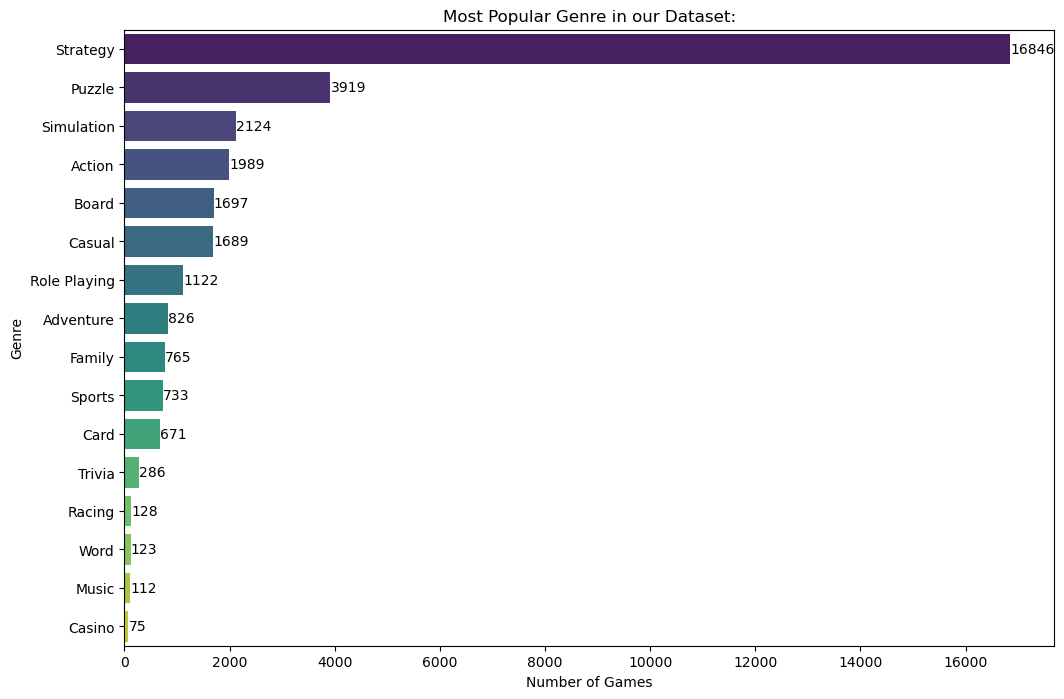

In [76]:
genres_list = df['game_genres'].str.split(',')

all_genres = [genre.strip() for sublist in genres_list.dropna() for genre in sublist if genre.strip()]

# all_genres = [genre for genre in all_genres if genre]
plt.figure(figsize=(12, 8))
ax = sns.countplot(y=all_genres, order=pd.Series(all_genres).value_counts().index, palette='viridis')

for i, count in enumerate(pd.Series(all_genres).value_counts().values):
    ax.text(count + 1, i, str(count), ha='left', va='center', fontsize=10)

plt.title('Most Popular Genre in our Dataset:')
plt.xlabel('Number of Games')
plt.ylabel('Genre')

plt.show()

* #### Which game genres have been the most popular over the years, and are there any noticeable trends or patterns?

In [77]:
unique_genres = list(set(genre.strip() for sublist in genres_list.dropna() for genre in sublist if genre != ''))

genre_data = pd.get_dummies(df['game_genres'].str.split(',').explode().str.strip())

genre_data = genre_data.groupby(df['original_release_date'].dt.strftime("%Y")).sum()

genre_data = genre_data[unique_genres]

genre_data

,Family,Racing,Board,Role Playing,Card,Trivia,Casino,Puzzle,Action,Simulation,Music,Adventure,Strategy,Word,Casual,Sports
original_release_date,,,,,,,,,,,,,,,,
2008,0,0,21,0,2,0,0,17,2,1,0,0,46,0,2,0
2009,8,0,48,6,9,0,2,47,19,12,0,5,175,4,11,3
2010,2,0,72,17,23,3,2,61,37,33,0,2,276,4,11,7
2011,12,2,93,51,39,6,0,111,54,55,1,16,483,3,21,10
2012,27,5,114,67,40,9,2,156,92,108,4,29,723,6,24,18
2013,93,14,156,101,80,12,4,242,118,127,15,55,1150,9,65,34
2014,122,28,188,110,87,21,3,510,174,191,13,98,1876,14,164,105
2015,152,6,206,132,78,42,14,605,243,198,19,100,2190,11,223,69
2016,112,24,244,205,87,81,21,742,378,339,22,182,3099,26,382,136


* #### Over the years what is the distribution of popularity regarding game genres?

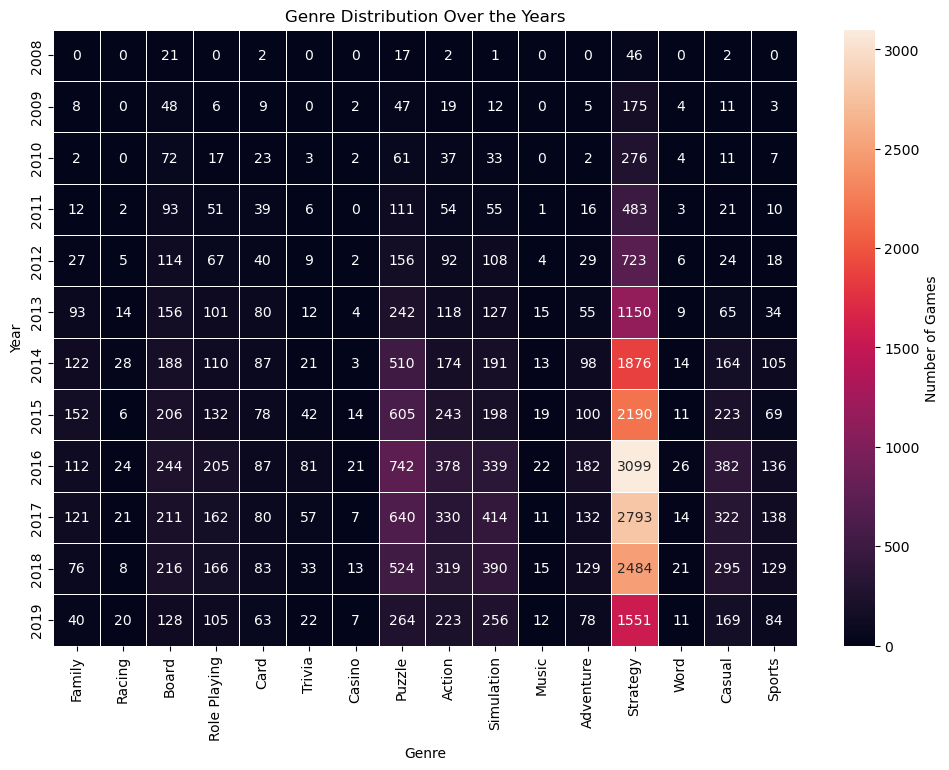

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(genre_data, cmap='rocket', annot=True, fmt='d', linewidths=.5, cbar_kws={'label': 'Number of Games'})
plt.title('Genre Distribution Over the Years')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

* #### In our dataset, who are the top 20 developers with the most released games?

In [79]:
# Assuming df is your DataFrame
df['developer'].replace("Tapps Tecnologia da Informa\\xe7\\xe3o Ltda.", "Tapps Tecnologia da Informação Ltda.", inplace=True)

df.query('developer.str.contains("Tapps")')[:1]

,app_id,app_name,avg_user_rating,user_rating_count,price,in_app_purchases,app_description,developer,age_rating,languages,size_in_mb,game_genres,original_release_date,current_version_release_date
1104,498226132,Honey Battle - Protect the Beehive from the Bears,4.0,246.0,0.0,"0.99, 1.99, 1.99, 3.99, 5.99, 1.99, 5.99, 3.99...",The most thrilling tower shooter and defense s...,Tapps Tecnologia da Informação Ltda.,9+,EN,27.05,"Strategy,Family",2012-02-17,10-10-2014


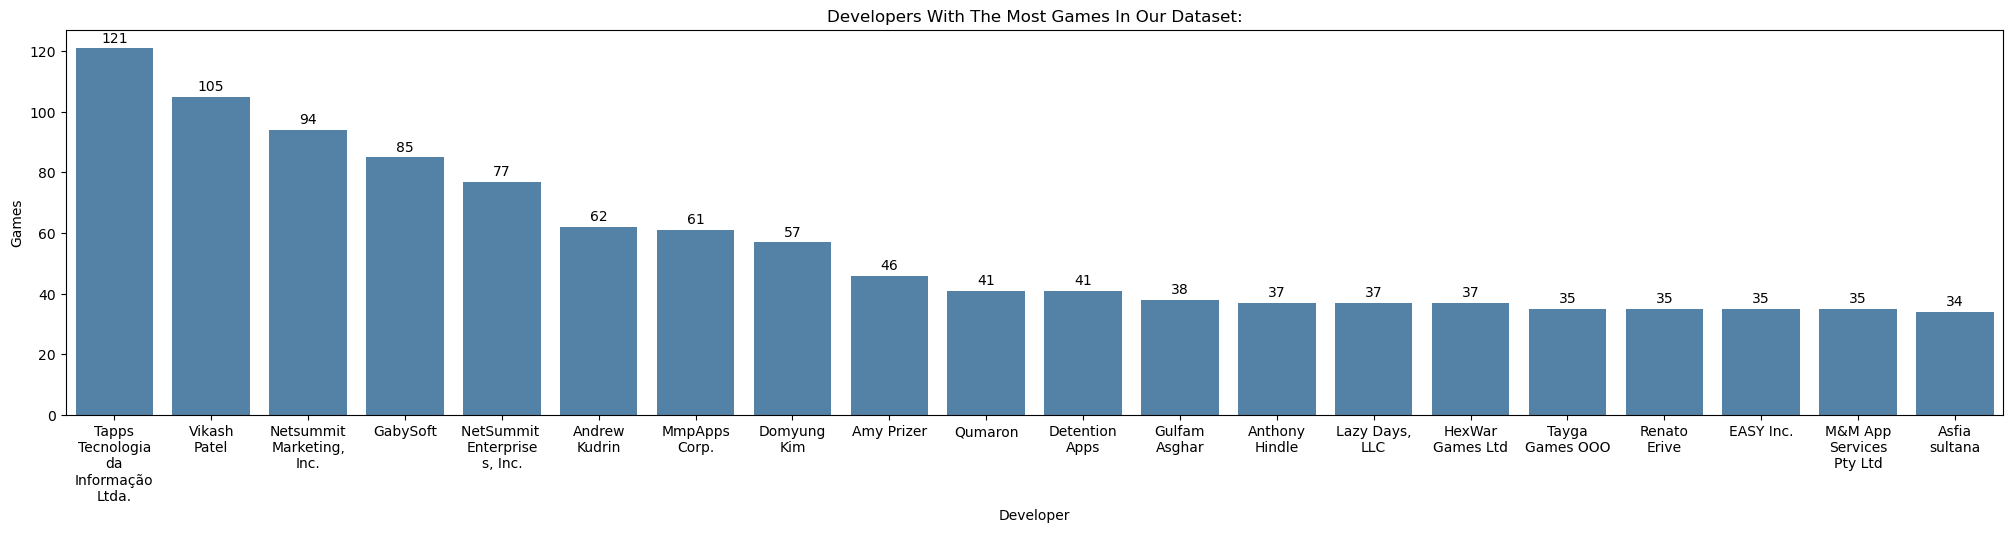

In [80]:
developers = df['developer'].value_counts()[:20]

x_values = developers.index
y_values = developers.values

plt.figure(figsize=(25, 5))
ax = sns.barplot(x=x_values, y=y_values, order=x_values, color='steelblue')
plt.tick_params(axis='x', rotation=0)

wrapped_labels = [textwrap.fill(label, width=10) for label in x_values]
ax.set_xticklabels(wrapped_labels)

for i, count in enumerate(y_values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Developers With The Most Games In Our Dataset:')
plt.xlabel('Developer')
plt.ylabel('Games')
plt.show()

* #### What is the average user rating for each of the top 20 developers? Are there any variations in user ratings among these developers?

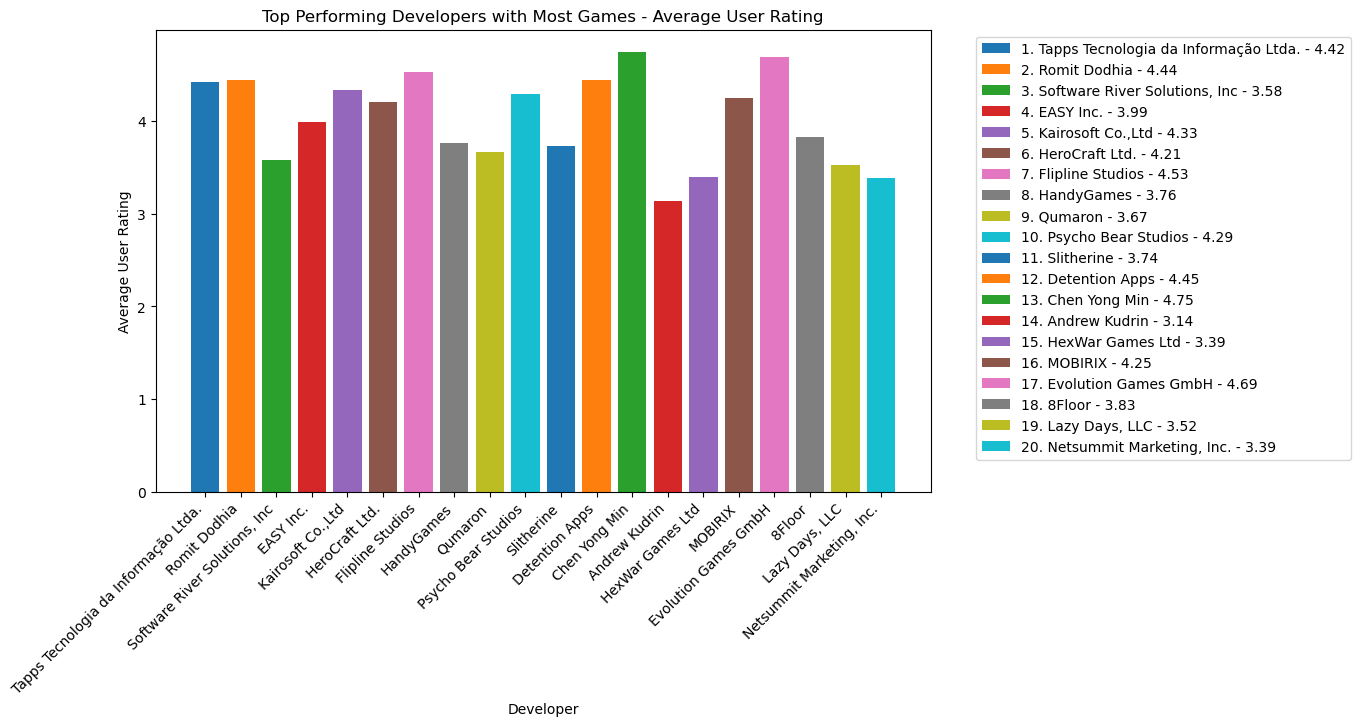

In [81]:
df_filtered = df.dropna(subset=['avg_user_rating'])

developer_groups = df_filtered.groupby('developer')

developer_metrics = developer_groups.agg({
    'avg_user_rating': 'mean',
    'user_rating_count': 'sum'
}).reset_index()

developers = df_filtered['developer'].value_counts()[:20]
top_devs = developer_metrics[developer_metrics['developer'].isin(developers.index)]

top_devs = top_devs.sort_values(by='user_rating_count', ascending=False)

plt.figure(figsize=(10, 6))

for i, (developer, avg_rating) in enumerate(zip(top_devs['developer'], top_devs['avg_user_rating'])):
    plt.bar(developer, avg_rating, label=f'{i+1}. {developer} - {avg_rating:.2f}')

plt.xlabel('Developer')
plt.ylabel('Average User Rating')
plt.title('Top Performing Developers with Most Games - Average User Rating')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.show()


* ### Tapps case study of average user ratings over the years


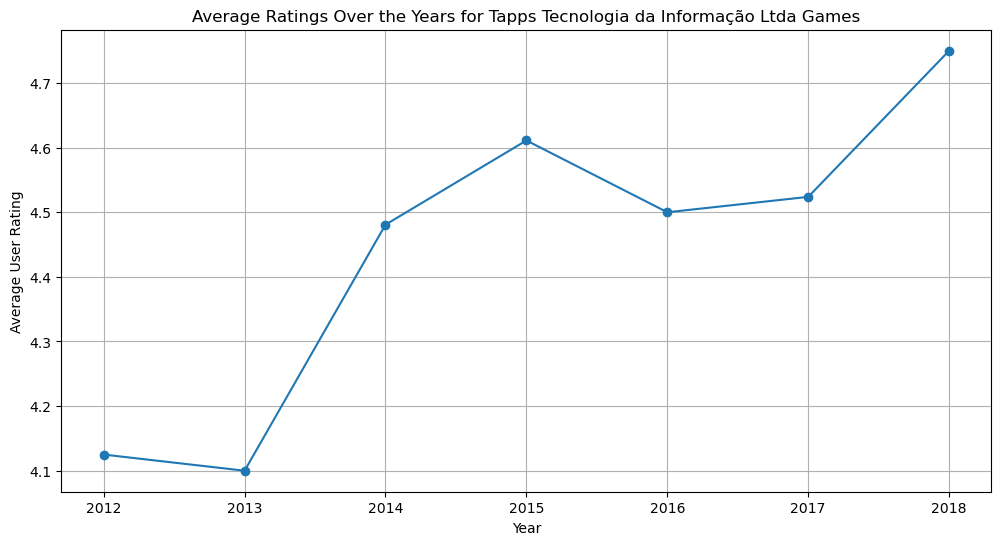

In [82]:
tapps_games = df[df['developer'] == 'Tapps Tecnologia da Informação Ltda.']

tapps_avg_ratings_over_years = tapps_games.groupby(tapps_games['original_release_date'].dt.year)['avg_user_rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(tapps_avg_ratings_over_years.index, tapps_avg_ratings_over_years.values, marker='o', linestyle='-')
plt.title('Average Ratings Over the Years for Tapps Tecnologia da Informação Ltda Games')
plt.xlabel('Year')
plt.ylabel('Average User Rating')
plt.grid(True)
plt.show()


In [83]:
tapps_genres = tapps_games['game_genres'].str.split(',').explode().str.strip().replace('', float('nan')).dropna()


tapps_genre_counts = tapps_genres.value_counts().reset_index()
tapps_genre_counts.columns = ['Genre', 'Number of Games']

tapps_genre_counts
empty_genre_rows = tapps_games[tapps_games['game_genres'].str.contains('', na=False)]
empty_genre_rows[:2]

,app_id,app_name,avg_user_rating,user_rating_count,price,in_app_purchases,app_description,developer,age_rating,languages,size_in_mb,game_genres,original_release_date,current_version_release_date
1104,498226132,Honey Battle - Protect the Beehive from the Bears,4.0,246.0,0.0,"0.99, 1.99, 1.99, 3.99, 5.99, 1.99, 5.99, 3.99...",The most thrilling tower shooter and defense s...,Tapps Tecnologia da Informação Ltda.,9+,EN,27.05,"Strategy,Family",2012-02-17,10-10-2014
1166,505857563,Nurikabe - Free Board Game by Tapps Games,4.0,60.0,0.0,"0.99, 0.99, 0.99",Have you ever played Sudoku or Minesweeper? Yo...,Tapps Tecnologia da Informação Ltda.,4+,EN,21.16,"Board,Strategy",2012-09-03,05-11-2014


* #### How are user ratings distributed among the games, and what info can we gather from that?

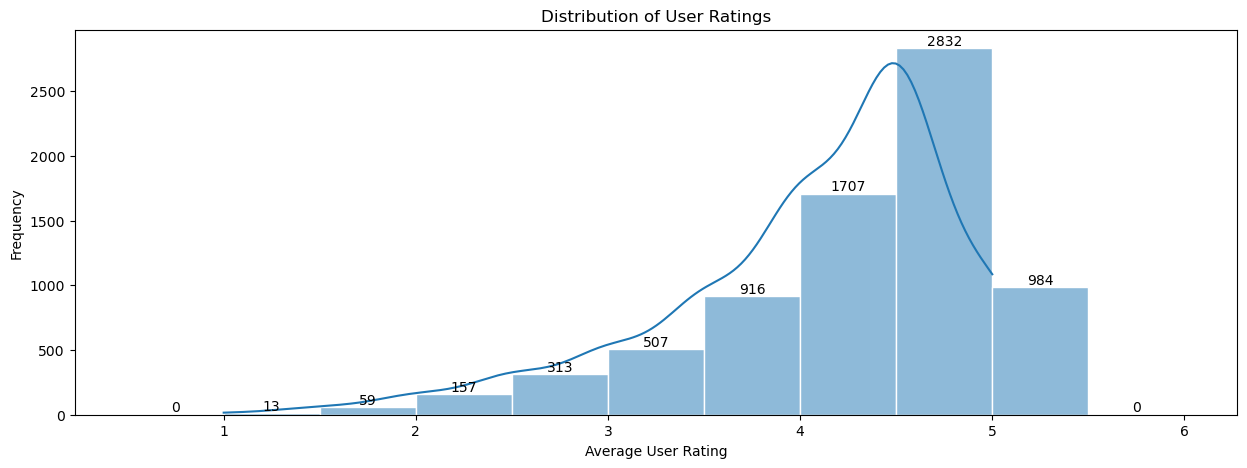

In [84]:
rating = df['avg_user_rating']

bin_edges = np.arange(rating.min() - 0.5, rating.max() + 1.5, 0.5)

plt.figure(figsize=(15, 5))
ax = sns.histplot(data=df, x=rating, bins=bin_edges, edgecolor='w', kde=True, kde_kws={'bw_method': 0.3})

for i, count in enumerate(ax.patches):
    height = count.get_height()
    ax.text(count.get_x() + count.get_width() / 2, height + 1, int(height), ha='center', va='bottom', fontsize=10)

plt.title('Distribution of User Ratings')
plt.xlabel('Average User Rating')
plt.ylabel('Frequency')
plt.show()


* #### What is the frequency of in-app purchases in the dataset, and how do user ratings vary between free-to-play and paid games?

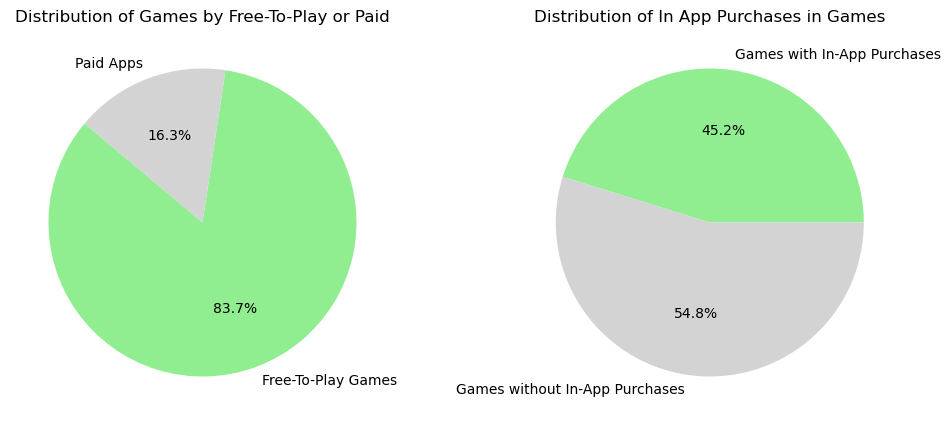

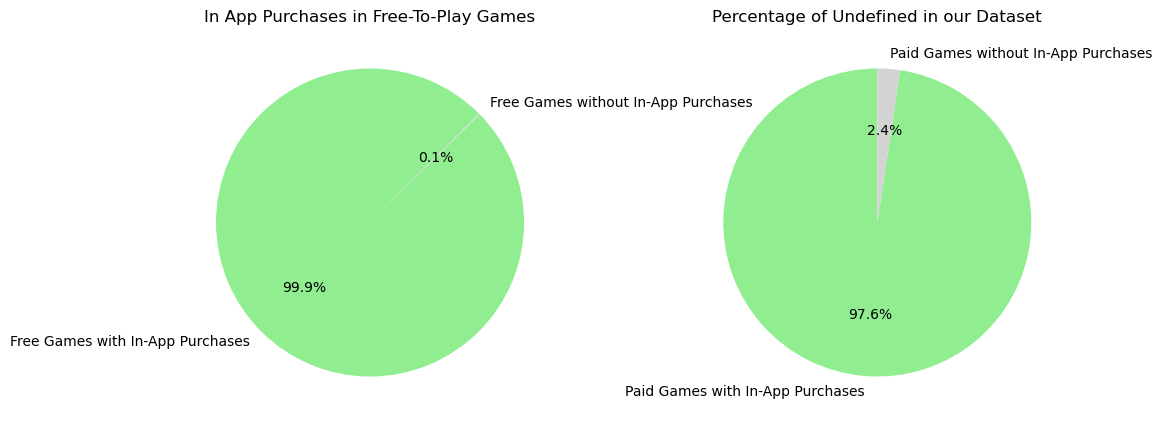

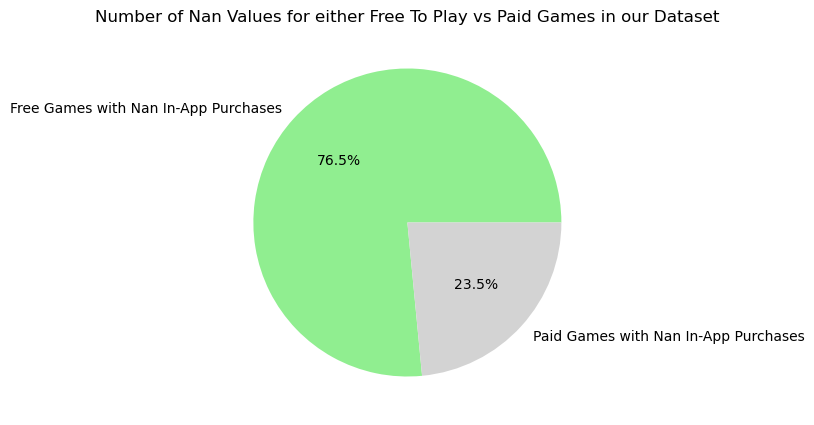

In [85]:
free_games = df[(df['price'] <= 0) | (df['price'].isnull())]
paid_games = df[(df['price'] > 0) & (~df['price'].isnull())]

in_app_purchase = df[(df['in_app_purchases'].notnull())]
no_in_app_purchase = df[(df['in_app_purchases'].isnull())]

paid_games_with = df[(df['price'] > 0) & (df['in_app_purchases'].notna())]
paid_games_without = df[(df['price'] >= 0) & (df['in_app_purchases'].str.strip() == '0')]

free_games_without = df[(df['price'] <= 0) & (df['in_app_purchases'].str.strip() == '0')]
free_games_with = df[(df['price'] <= 0) & (df['in_app_purchases'].notna())]

free_games_nan = df[(df['price'] <= 0) & (df['in_app_purchases'].isna())]
paid_games_nan = df[(df['price'] > 0) & (df['in_app_purchases'].isna())]


# Counting Apps for each part
free_games_count = len(free_games)
paid_games_count = len(paid_games)
in_app_purchase_count = len(in_app_purchase)
no_in_app_purchase_count = len(no_in_app_purchase)


# Game Price Comparisson
pricing_labels = ['Free-To-Play Games', 'Paid Apps']
pricing_sizes = [free_games_count, paid_games_count]
pie_color = ['lightgreen', 'lightgray']

# Data for the first Pie Chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(pricing_sizes, labels=pricing_labels, colors=pie_color, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Games by Free-To-Play or Paid')

# Percentage of Games with In App Purchases and Games Without 
in_app_labels = ['Games with In-App Purchases', 'Games without In-App Purchases']
in_app_sizes = [in_app_purchase_count, no_in_app_purchase_count]
pie_2_color = ['lightgreen', 'lightgray']

# Second Pie Chart
plt.subplot(1, 2, 2)
plt.pie(in_app_sizes, labels=in_app_labels, colors=pie_2_color, autopct='%1.1f%%')
plt.title('Distribution of In App Purchases in Games')

# Percentage of Paid Games with and without In App Purchases
free_labels = ['Free Games with In-App Purchases', 'Free Games without In-App Purchases']
free_sizes = [len(free_games_with), len(free_games_without)]
pie_3_color = ['lightgreen', 'lightgray']

# Third Pie Chart
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(free_sizes, labels=free_labels, colors=pie_3_color, autopct='%1.1f%%', startangle=45)
plt.title('In App Purchases in Free-To-Play Games')

# Percentage of Free To Play Games with and without In App Purchases
paid_labels = ['Paid Games with In-App Purchases', 'Paid Games without In-App Purchases']
paid_sizes = [len(paid_games_with), len(paid_games_without)]
pie_4_color = ['lightgreen', 'lightgray']

# Fourth Pie Chart
plt.subplot(1, 2, 2)
plt.pie(paid_sizes, labels=paid_labels, colors=pie_4_color, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Undefined in our Dataset')


# Fifth Pie Chart
plt.figure(figsize=(12, 5))
nan_labels = ['Free Games with Nan In-App Purchases', 'Paid Games with Nan In-App Purchases']
nan_sizes = [len(free_games_nan), len(paid_games_nan)]
pie_5_color = ['lightgreen', 'lightgray']

plt.subplot(1, 2, 1)
plt.pie(nan_sizes, labels=nan_labels, colors=pie_5_color, autopct='%1.1f%%')
plt.title('Number of Nan Values for either Free To Play vs Paid Games in our Dataset')


plt.show()


* ### Average User ratings for Free Games vs Paid Games

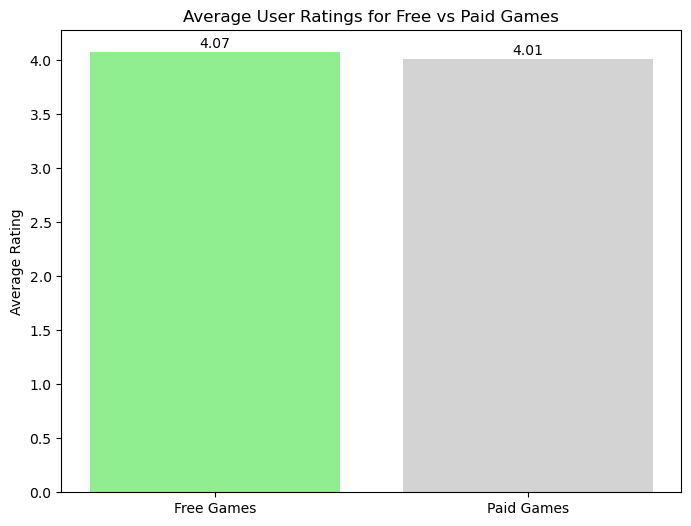

In [86]:
free_games_avg_rating = df[(df['price'] <= 0) & (~df['avg_user_rating'].isna())]['avg_user_rating'].mean()
paid_games_avg_rating = df[(df['price'] > 0) & (~df['avg_user_rating'].isna())]['avg_user_rating'].mean()

plt.figure(figsize=(8, 6))
avg_rating_labels = ['Free Games', 'Paid Games']
avg_rating_values = [free_games_avg_rating, paid_games_avg_rating]
bar_avg_rating_colors = ['lightgreen', 'lightgray']

bars = plt.bar(avg_rating_labels, avg_rating_values, color=bar_avg_rating_colors)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', ha='center', va='bottom', fontsize=10)


plt.title('Average User Ratings for Free vs Paid Games')
plt.ylabel('Average Rating')
plt.show()


In [87]:
devs_count = df_filtered['developer'].value_counts()
filtered_devs_count = devs_count[devs_count.index.isin(top_devs['developer'])]

dev_data = pd.DataFrame({
    'Developer': top_devs['developer'],
    'Number of Games': filtered_devs_count.values,
    'Total Number of Ratings': top_devs['user_rating_count'],
    'Average User Rating': top_devs['avg_user_rating'],
})

dev_data.reset_index(drop=True, inplace=True)
dev_data

,Developer,Number of Games,Total Number of Ratings,Average User Rating
0,Tapps Tecnologia da Informação Ltda.,113,274556.0,4.424779
1,Romit Dodhia,38,70971.0,4.444444
2,"Software River Solutions, Inc",36,40553.0,3.575000
3,EASY Inc.,35,26368.0,3.985714
4,"Kairosoft Co.,Ltd",32,23344.0,4.333333
5,HeroCraft Ltd.,29,16159.0,4.205882
6,Flipline Studios,26,9507.0,4.526316
7,HandyGames,21,9243.0,3.761905
8,Qumaron,21,3654.0,3.666667
9,Psycho Bear Studios,21,3251.0,4.289474


# Conclusion

### Exploration of the Apple App Store For Stategy Games

### At the start of our quest to explore this Apple App Store Game's Dataset, I had several questions about it, through this analysis and subsequent exploration, I now present my discoveries regarding this dataset.  

### 1. Unique and Combined Language's Distribution:

* Our analysis commenced with an exploration of language distribution across all games. We divided our exploration into two tables, one to see all entries by language, and the other to see all the combinations used and how many times such combinations were repeated, English (EN) took the leading role, with 16,736 entries, closely followed by Chinese (ZH) with 4,945 for the individual language count.  For the combined language count, English (EN) is still in the lead, with a count of 12,412 followed by a combination of Chinese and English [EN, ZH] with 352 counts. We found that out of 16,847 Apple Store games, 16,736 games have English as a main language or as an option making, it a very popular choice to reach a really large audience of players.

### 2. Impact of Supported Languages on Ratings:

* Concurring with our analysis in the point above, our exploration of language support vs average user ratings, revealed that games with multilingual options tended to receive higher average user ratings.

### 3. Genre Distribution:

* The dataset revealed to have a broad range of gaming genres. With "Strategy" being the most used by developers with 16,846 out of 16,847 Apple Store games which means its used in almost every game in the Apple Store, closely followed by "Puzzle" with a count of 3919 and "Simulation" with 2124 games. Through this analysis, its an interesting study where developers and companies can see how saturated a market is as well as what's trending in the Apple Store.

### 4. Genre Popularity Over Time:

* This part of our analysis focused on the popularity of genres over the years, showing a consistent popularity for genres such as "Casual", "Strategy", "Action" and "Puzzle" (Although this last one had its peak in 2016 it has fallen quite a bit in the years afterwards). This analysis over the rising trends in game releases across various genres helps us study the evolving nature of the Apple Store gaming industry.

### 5. Ranking Developers by Count of Games Released:

* In regards to developers of the Apple App Store, Tapps Tecnologia da Informação Ltda. emerged as a standout with a considerably large portfolio of 121 released games. Considering these results, we used this company for a research of popularity over the years and how each game has fared in terms of average user ratings.

### 6. Top Developers and User Ratings:

* Delving into the realm of top developers, we pinpointed Tapps Tecnologia da Informação Ltda., Romit Dodhia, and Software River Solutions, Inc. as leaders with consistently high average user ratings. This underscores the pivotal role developers play in shaping user experiences on the Apple platform.

### 7. In-App Purchases and User Ratings:

* Exploring monetization strategies, we found that 45.20% of games featured in-app purchases. Intriguingly, only a small fraction of paid games incorporated this model. Average user ratings leaned slightly higher for free games (4.07) compared to their paid counterparts (4.01).

### 8. Conclusion:

* In conclusion, our exploratory data analysis provides a nuanced view of the Apple gaming landscape. The diversity within the industry, the influence of developers, the intricacies of monetization models, and the evolving popularity of genres collectively contribute to the intricate tapestry of Apple gaming. These insights stand as a robust foundation for further analysis and strategic decision-making in the ever-evolving realm of Apple gaming.